In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.cm import get_cmap

import pickle
import os

import numpy as np 
plt.rcParams['animation.embed_limit'] = 100  # Set the embed limit to 100 MB

plt.rcParams.update({"text.usetex": True, "font.family": "Times new roman"}) # Use latex fonts
plt.rcParams['lines.linewidth'] = 2
colors = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) # Set the color palette as default

In [2]:
from analysis_fiducial import * 

In [5]:
def get_box_slices(z, Lbox, Nbox, LineParams_input_1, LineParams_input_2, islice):

    box_slices = []
    vmin = []
    vmax = []
    cmap = []
    title = []

    folder_out = '../analysis_' + str(Lbox) + ',' + str(Nbox) 
    folder = folder_out + '/z' + str(round(z,1))        
    filename_all = folder + '/slices_' + str(islice) + '.pkl'

    if os.path.exists(filename_all):
        with open(filename_all, 'rb') as handle:
            temp =  pickle.load(handle)
            coeval_slice_density = temp['delta']
            coeval_slice_T21 = temp['T21']
            coeval_slice_SFRD = temp['SFRD']
            coeval_slice_xHI = temp['xHI']
            coeval_slice_LIM_1 = temp[LineParams_input_1['LINE']]
            coeval_slice_LIM_2 = temp[LineParams_input_2['LINE']]
    
    else:
        print('Coeval slices not found in ' + filename_all)
        print('You need to run cross_correlation_boxes.py first!')
        return -1        


    ### DENSITY 
    box_slices.append(coeval_slice_density)
    cmap.append('magma')
    title.append(r'$\delta$')
    vmin.append(-0.6)
    vmax.append(0.6)

    ### SFRD
    box_slices.append(coeval_slice_SFRD)
    cmap.append('bwr')
    title.append(r'${\rm SFRD}\,[M_\odot/{\rm yr}]$')
    vmin.append(1e-5)
    vmax.append(1e-1)

    ### XHI
    box_slices.append(coeval_slice_xHI)
    cmap.append('gray')
    title.append(r'$x_{\rm HI}$')
    vmin.append(0)
    vmax.append(1)

    ### T21
    box_slices.append(coeval_slice_T21)
    cmap.append(eor_colour)
    title.append(r'$T_{21}\,[\mu {\rm K}]$')
    vmin.append(min_value)
    vmax.append(max_value)

    vmax_OIII = 7.
    vmax_Ha = 9.

    ### LIM 1 
    box_slices.append(coeval_slice_LIM_1)
    cmap.append(LIM_colour_1)
    title.append(r'$T_{\rm %s}\,[\mu{\rm K}]$'%LineParams_input_1['LINE']) 
    vmin.append(0.)
    if LineParams_input_1['LINE'] == 'OIII':
        vmax.append(vmax_OIII)
    elif LineParams_input_1['LINE'] == 'Ha':
        vmax.append(vmax_Ha)
    else:
        vmax.append(10.)

    ### LIM2
    box_slices.append(coeval_slice_LIM_2)
    cmap.append(LIM_colour_2)
    title.append(r'$T_{\rm %s}\,[\mu{\rm K}]$'%LineParams_input_2['LINE']) 
    vmin.append(0.)
    if LineParams_input_2['LINE'] == 'OIII':
        vmax.append(vmax_OIII)
    elif LineParams_input_2['LINE'] == 'Ha':
        vmax.append(vmax_Ha)
    else:
        vmax.append(10.)
    
    return box_slices, cmap, title, vmin, vmax


Doing z = 20.0
Doing z = 20.0
Doing z = 13.0
Doing z = 20.0
Doing z = 20.0
Doing z = 13.0
Doing z = 20.0
Doing z = 20.0
Doing z = 13.0


Doing z = 20.0


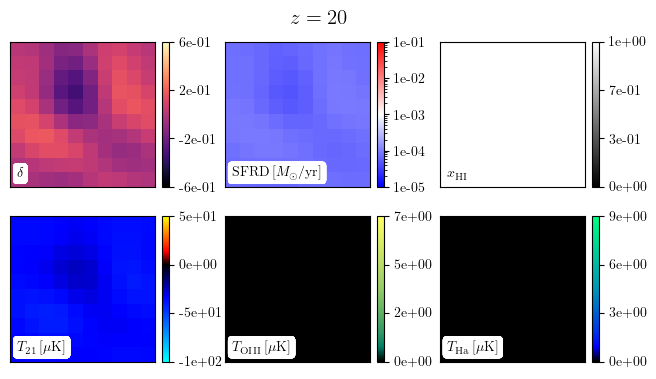

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(7, 4))
subpl = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]

box_slices, cmap, title, vmin_use, vmax_use = get_box_slices(zvals[0], Lbox_fid, Nbox_fid, LineParams_input_1_fid, LineParams_input_2_fid, islice)

im = []
cbar = []
for j in range(len(box_slices)):

    im.append(ax[subpl[j]].imshow(box_slices[j],extent=(0,Lbox_fid,0,Lbox_fid),cmap=cmap[j],vmax =vmax_use[j], vmin = vmin_use[j]))
    cbar.append(fig.colorbar(im[j], ax=ax[subpl[j]], fraction=0.046, pad=0.04, format="%.0e"))


def animate(ff, zvals, Lbox, Nbox, LineParams_input_1,  LineParams_input_2, islice, im):
        
    zi = zvals[ff]
    print('Doing z = ' + str(zi))

    box_slices, cmap, title, vmin_use, vmax_use = get_box_slices(zi, Lbox, Nbox, LineParams_input_1,LineParams_input_2, islice)
    
    for i in range(len(box_slices)):

        if cmap[i] == 'bwr':
            im[i] = ax[subpl[i]].imshow(box_slices[i],extent=(0,Lbox,0,Lbox),cmap=cmap[i],norm = LogNorm(vmin=vmin_use[i], vmax=vmax_use[i]))

        else:
            im[i] = ax[subpl[i]].imshow(box_slices[i],extent=(0,Lbox,0,Lbox),cmap=cmap[i],vmax =vmax_use[i], vmin = vmin_use[i])
        cbar[i].update_normal(im[i])

        if cmap[i] == 'bwr':
            xticks = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]  
        else:
            xticks = np.linspace(vmin_use[i],vmax_use[i],4)
        array_ticks = np.vectorize(lambda x: f"{x:.0e}")(xticks)
        
        cbar[i].set_ticks(xticks, labels = array_ticks)
        
        ax[subpl[i]].text(
            0.05, 0.05, title[i], 
            color='black',
            fontsize=10,
            ha='left', va='bottom',
            transform=ax[subpl[i]].transAxes,  
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3')  
        )
        ax[subpl[i]].set_xticks([])
        ax[subpl[i]].set_yticks([])

    fig.suptitle(r'$z = %g$'%round(zi,1), fontsize=15)
    fig.subplots_adjust(left=0.05, right=0.9, top=0.9, bottom=0.1, wspace=0.3)
    
    return fig


ani = animation.FuncAnimation(fig=fig, 
                              func=animate, 
                              frames=len(zvals)-1, 
                              fargs=(zvals, Lbox_fid, Nbox_fid, LineParams_input_1_fid, LineParams_input_2_fid, islice, im), 
                              interval=80)

folder_out = '../analysis_' + str(Lbox_fid) + ',' + str(Nbox_fid) 
folder_plot = folder_out + '/plots' 
if not os.path.exists(folder_plot):
    os.makedirs(folder_plot)

ani.save(folder_plot + '/boxes_animation.gif', writer='pillow', fps=5)
ani.save(folder_plot + '/boxes_animation.mp4', writer='ffmpeg', fps=5)
HTML(ani.to_jshtml())